In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [40]:
features, targets = make_classification(n_samples = 20,
                                      n_features = 2,
                                      n_informative = 1,
                                      n_redundant = 0,
                                      n_clusters_per_class = 1,
                                      random_state = 1)

In [41]:
df = pd.DataFrame(data=features, columns=['x1', 'x2'])
df['targets'] = targets
df.head()

,x1,x2,targets
0,-0.887629,0.784959,1
1,-0.012665,1.141704,1
2,-0.191836,0.984424,1
3,-0.267888,-0.330421,0
4,-0.935769,-1.883225,0


Let's check the `shape` of our data. This tells us (rows, columns).

In [42]:
df

,x1,x2,targets
0,-0.887629,0.784959,1
1,-0.012665,1.141704,1
2,-0.191836,0.984424,1
3,-0.267888,-0.330421,0
4,-0.935769,-1.883225,0
5,0.234416,1.405825,1
6,0.530355,-1.292116,0
7,-0.122890,-0.667896,0
8,-0.845206,1.760128,1
9,1.659802,1.063621,1


In [43]:
features.shape

(20, 2)

In [44]:
targets.shape

(20,)

`np.bincount` is a quick way to count how many samples of each class we have.

In [45]:
np.bincount(targets)

array([10, 10])

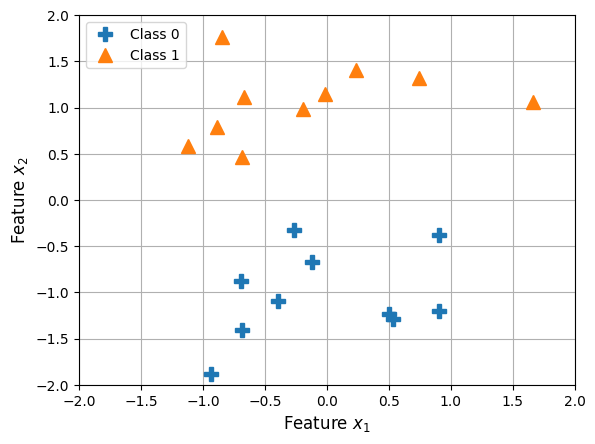

In [46]:
plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker = 'P',
    markersize = 10,
    linestyle = '',
    label = 'Class 0'
    )
plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker = '^',
    markersize = 10,
    linestyle = '',
    label = 'Class 1')
plt.legend(loc = 2)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()

In [47]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

ppn = Perceptron(num_features = 2)
ppn.weights

[0.0, 0.0]

In [48]:
ppn.bias

0

In [49]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0

        return prediction

ppn = Perceptron(num_features = 2) # Re-initialize with 2 features
x = [1.23, 2.13]
ppn.forward(x)

0

The prediction in the above case is 0 because the weights and bias of the perceptron are still 0. It has not learned anything yet.

In [50]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, y_true):
    #     prediction = self.forward(x)
    #     error = y_true - prediction
    #
    #     self.bias += error
    #     for i, _ in enumerate(self.weights):
    #         self.weights[i] += error * x[i]
    #
        return 1

ppn = Perceptron(num_features = 2)
x = [1.1, 2.1]
# ppn.update(x, y_true = 1)

Let's check what happened to the weights and bias. Since the prediction was 0 (all weights were 0), and the true label was 1, the `error` was `1 - 0 = 1`.

The new bias should be `0 + 1 = 1`.
The new weights should be `[0 + (1 * 1.1), 0 + (1 * 2.1)]` = `[1.1, 2.1]`.

In [51]:
print("Model parameters:")
print("Weights:", ppn.weights)
print("Bias:", ppn.bias)

Model parameters:
Weights: [0.0, 0.0]
Bias: 0


In [52]:
def train(model, X_train, y_train, epochs):
    # Training Loop
    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(X_train, y_train):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch {epoch + 1} errors {error_count}")

Let's create a new Perceptron and train it for 5 epochs on our `features` and `targets`.

In [53]:
ppn = Perceptron(num_features = 2)
train(ppn, features, targets, epochs = 5)

Epoch 1 errors 20
Epoch 2 errors 20
Epoch 3 errors 20
Epoch 4 errors 20
Epoch 5 errors 20


Look at that! After just 2 epochs, the model made **0 errors**. This means it has found a set of weights and bias that perfectly separates the training data. The Perceptron algorithm is guaranteed to find a solution *if* one exists (i.e., if the data is linearly separable).

In [54]:
def compute_accuracy(model, features, targets):
    correct = 0.0

    for x, y in zip(features, targets):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(targets)

In [55]:
train_acc = compute_accuracy(ppn, features, targets)
print("Model Accuracy:", train_acc)

Model Accuracy: 0.5


An accuracy of 1.0 means 100% correct. Perfect!

In [56]:
def plot_boundary(model):
    try:

        w1, w2 = model.weights[0], model.weights[1]
        b = model.bias

        # z = w1*x1 + w2*x2 + b = 0
        # => x2 = (-w1*x1 - b) / w2

        x1_min = -20
        x2_min = (-(w1 * x1_min) - b) / w2

        x1_max = 20
        x2_max = (-(w1 * x1_max) - b) / w2
    except ZeroDivisionError:
        return 1, 1, 1, 1
    return x1_min, x1_max, x2_min, x2_max

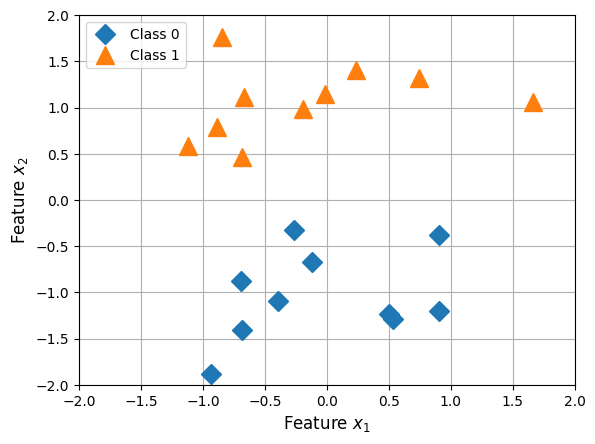

In [57]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)
plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

# Plot the decision boundary
plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()

### Conclusion

And there it is! The black line is the decision boundary learned by our Perceptron. Everything on one side of the line will be predicted as Class 0, and everything on the other side will be predicted as Class 1.

This demonstrates how a simple Perceptron model can learn a linear classifier from data. While limited to linearly separable problems, the Perceptron formed the foundation for all the more complex neural networks that are used today.